# Goals ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Homework kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#### Import dataset

In [3]:
df=pd.read_csv('Automobile_data.csv')
pd.set_option('display.max_columns', 100)

**quick look**

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [7]:
df.duplicated().any()

False

In [8]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Missing Values and Data Type**

In [137]:
nama_kolom = list(df.columns)

for kolom in nama_kolom:
    df.loc[df[kolom]=='?', kolom] = np.nan
    
#mengganti nilai yang berisi ? menjadi NaN

In [11]:
def missing_data(df):    
    df_miss = pd.DataFrame(df.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count']!=0]
    df_miss['percent'] = round(df_miss['count']/df.shape[0]*100, 2)
    tipe_data = []
    contoh_data = []
    for kolom in list(df_miss['column']):
        tipe_data.append(df[kolom].dtype)
        contoh_data.append(df[kolom][100])
    df_miss['DataType'] = tipe_data
    df_miss['Example'] = contoh_data
    return df_miss

In [12]:
missing_data(df)

,column,count,percent,DataType,Example
1,normalized-losses,41,20.00,object,106
5,num-of-doors,2,0.98,object,four
18,bore,4,1.95,object,3.33
19,stroke,4,1.95,object,3.47
21,horsepower,2,0.98,object,97
22,peak-rpm,2,0.98,object,5200
25,price,4,1.95,object,9549


In [13]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
kolom_flt = ['normalized-losses', 'horsepower', 'peak-rpm', 'bore', 'stroke']

for kolom in kolom_flt:
    df[kolom] = df[kolom].astype('float64') 
    
#parameter dalam kolom_flt diubah type datanya menjadi float

In [15]:
median_kolom = ['normalized-losses', 'horsepower', 'peak-rpm']
mean_kolom = ['bore', 'stroke']

for kolom in median_kolom:
    df[kolom] = df[kolom].fillna(df[kolom].median())

for kolom in mean_kolom:
    df[kolom] = df[kolom].fillna(df[kolom].mean())

In [16]:
missing_data(df)

,column,count,percent,DataType,Example
5,num-of-doors,2,0.98,object,four
25,price,4,1.95,object,9549


In [17]:
int_kolom = ['normalized-losses', 'horsepower', 'peak-rpm']

for kolom in int_kolom:
    df[kolom] = df[kolom].astype('int64')   
    #dijadikan int karena int_kolom berupa object / str

In [18]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])
#mengisi missing value pada kolom num-of-doors dengan nilai modus

In [19]:
missing_data(df)

,column,count,percent,DataType,Example
25,price,4,1.95,object,9549


In [20]:
df.dropna(inplace=True)
#menghapus data yang kosong pada kolom price

In [21]:
missing_data(df)

,column,count,percent,DataType,Example


In [22]:
df.notnull().values.sum()

5226

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


**Make Some Visualization**

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


In [25]:
df2 = df.copy()
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470


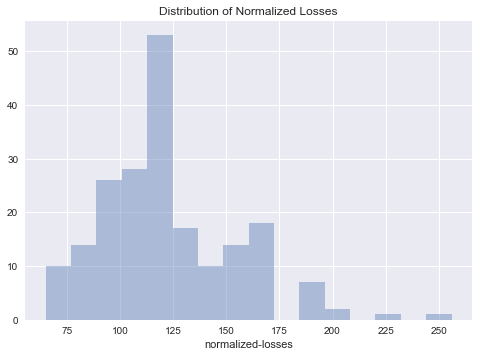

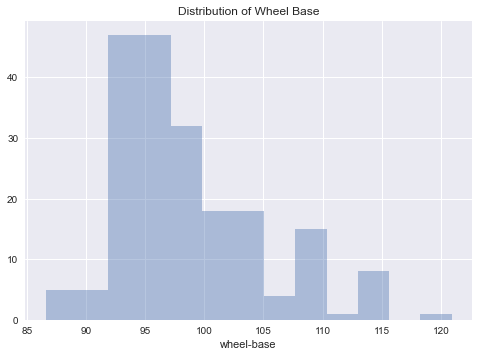

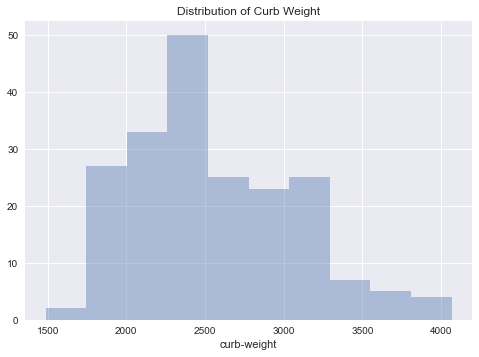

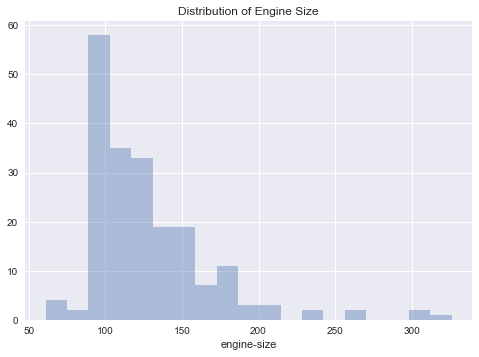

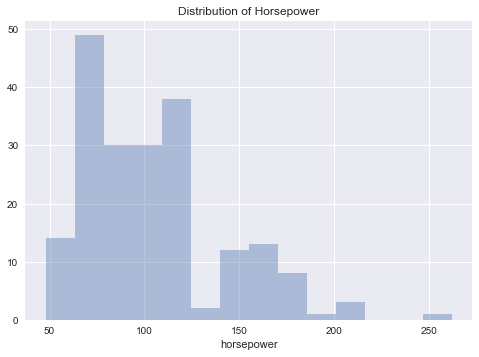

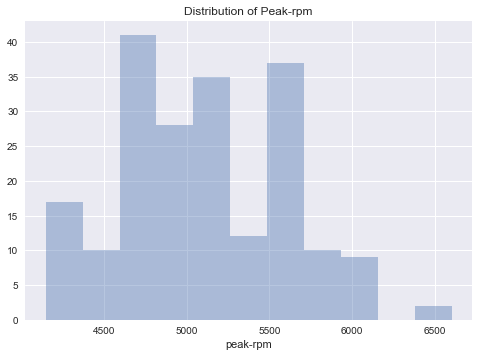

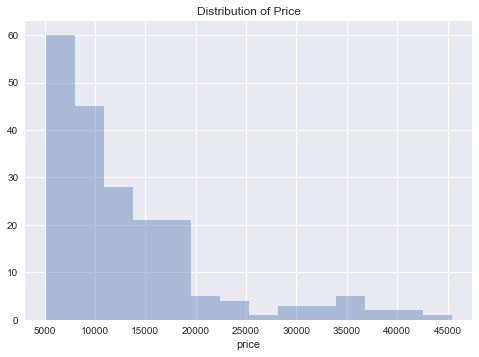

In [26]:
fig = sns.distplot(df['normalized-losses'], kde = False)
plt.title('Distribution of Normalized Losses')
plt.show()

fig = sns.distplot(df['wheel-base'], kde = False)
plt.title('Distribution of Wheel Base')
plt.show()

fig = sns.distplot(df['curb-weight'], kde = False)
plt.title('Distribution of Curb Weight')
plt.show()

fig = sns.distplot(df['engine-size'], kde = False)
plt.title('Distribution of Engine Size')
plt.show()

fig = sns.distplot(df['horsepower'], kde = False)
plt.title('Distribution of Horsepower')
plt.show()

fig = sns.distplot(df['peak-rpm'], kde = False)
plt.title('Distribution of Peak-rpm')
plt.show()

fig = sns.distplot(df['price'], kde = False)
plt.title('Distribution of Price')
plt.show()

In [28]:
df['price'] = df['price'].astype('int64')
df
#mengubah tipe data kolom price menjadi int

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470


In [29]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int'])
df_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115,5500,18.0,22.0,17450


In [30]:
df_numeric = df_numeric.drop('symboling', axis=1)
df_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,115,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,115,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,115,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,164,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,164,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115,5500,18.0,22.0,17450


In [31]:
# correlation matrix
df_cor = df.corr()
df_cor

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391
normalized-losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.073586,-0.050753,0.044034,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366
wheel-base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.050753,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.565601,-0.266600,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.044034,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.093203,-0.060376,-0.033956,-0.034636,0.082269


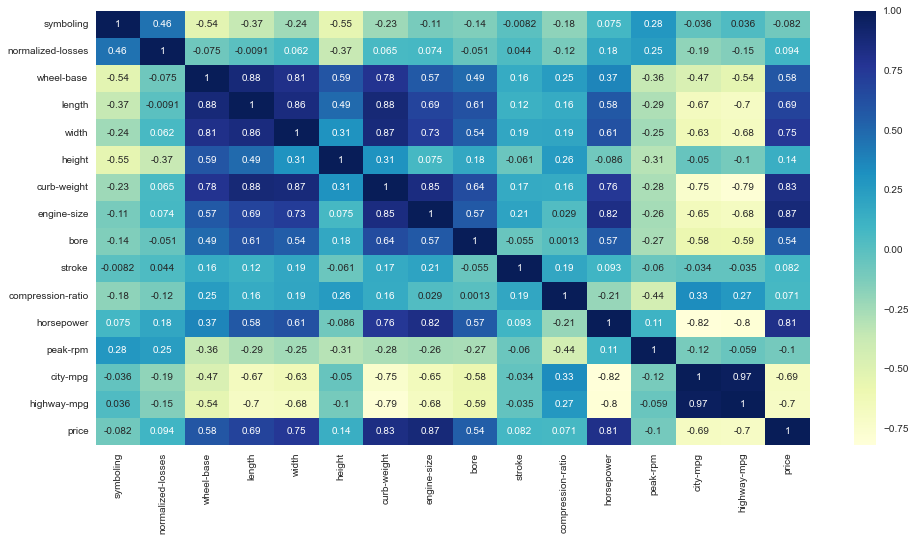

In [32]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_cor, cmap="YlGnBu", annot=True)
plt.show()

**Apakah tipe bahan bakar mempengaruhi harga?**

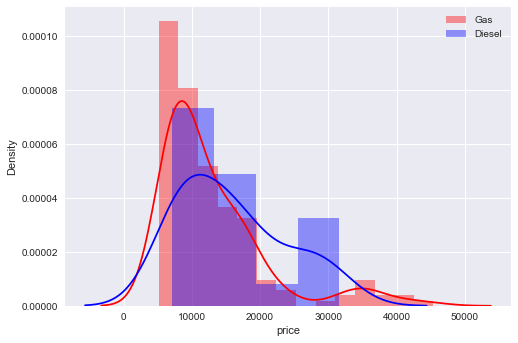

In [33]:
sns.distplot(df.loc[df['fuel-type']=='gas', 'price'], color='red', label='Gas')
sns.distplot(df.loc[df['fuel-type']=='diesel', 'price'], color='blue', label='Diesel')
plt.legend()

Dari histogram di atas dapat diambil kesimpulan kecenderungan mobil dengan bahan bakar diesel lebih mahal daripada yang berbahan bakar gas. Selain itu terdapat mobil dengan bahan bakar gas yang harganya di atas 3000 dolar, bahkan ada yang mencapai 4000 dolar. Namun harga mobil gas paling banyak ada di kisaran 700-800 dolar.
Sedangkan harga mobil dengan bahan bakar diesel paling tinggi di kisaran 3000 dolar dengan harga yang paling banyak di kisaran 1000-1500 dolar. 

# Data Preparation

#### Encode Data

In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


In [35]:
df2 = df.copy()
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470


In [36]:
kolom_object = list(df.select_dtypes('object').columns)

In [37]:
len(kolom_object)

10

In [38]:
df.select_dtypes('object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [39]:
one_hot_kolom = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']  #data ordinal tdk boleh diurutkan (dijadikan dummies)
binary_kolom = ['fuel-type', 'aspiration', 'engine-location'] #dijadikan 0 atau 1
find = ['num-of-cylinders',  'num-of-doors'] #dijadikan int/ format angka

In [40]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [41]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [42]:
encode_find = {
    'num-of-cylinders':{'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},
    'num-of-doors': {'two': 2, 'four': 4}
}

In [43]:
df.replace(encode_find, inplace=True)

In [44]:
#label encode
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

for kolom in binary_kolom:
    df[kolom] = lE.fit_transform(df[kolom])

In [45]:
#one hot encode

df= pd.get_dummies(df, columns=one_hot_kolom)

In [46]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115,1,0,2,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115,1,0,2,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,115,1,0,2,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154,5000,19.0,26.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2.0,164,1,0,4,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102,5500,24.0,30.0,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,164,1,0,4,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115,5500,18.0,22.0,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    float64
 1   normalized-losses       201 non-null    int64  
 2   fuel-type               201 non-null    int32  
 3   aspiration              201 non-null    int32  
 4   num-of-doors            201 non-null    int64  
 5   engine-location         201 non-null    int32  
 6   wheel-base              201 non-null    float64
 7   length                  201 non-null    float64
 8   width                   201 non-null    float64
 9   height                  201 non-null    float64
 10  curb-weight             201 non-null    float64
 11  num-of-cylinders        201 non-null    int64  
 12  engine-size             201 non-null    float64
 13  bore                    201 non-null    float64
 14  stroke                  201 non-null    fl

**Train Test Split**

In [49]:
x = df.drop('price', axis=1) #independent
y = df[['price']]
 #dependent

**Scaling**

Note : Lakukan scaling hanya pada data training

In [99]:
from sklearn.preprocessing import RobustScaler

In [100]:
minmax_scaler = RobustScaler()

menggunakan robust scaler karena data outlier tidak dibuang

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
kolom_scale = x.columns

for i in kolom_scale:
    x_train[i] = robust_scaler.fit_transform(np.array(x_train[i]).reshape(-1, 1))

In [104]:
x_train.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
202,-1.0,-0.555556,0.0,0.0,0.0,0.0,1.537975,0.951220,1.387755,0.397163,0.806780,2.0,1.453488,0.613636,-1.576923,-0.250,0.861878,0.428571,-0.634146,-0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,-0.5,-0.833333,0.0,0.0,0.0,0.0,-0.056962,0.134146,-0.122449,0.000000,-0.153220,0.0,-0.011628,-0.363636,1.153846,0.000,-0.198895,0.857143,0.243902,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.916667,0.0,0.0,0.0,0.0,-0.411392,-0.969512,-0.693878,-0.992908,-0.580339,0.0,-0.476744,-0.772727,-0.192308,0.500,-0.596685,0.428571,0.634146,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,1.972222,0.0,0.0,-1.0,0.0,-0.310127,-0.262195,1.142857,-1.106383,0.489492,0.0,0.941860,1.431818,-0.653846,0.625,1.060773,0.428571,-0.536585,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,-1.0,-0.555556,0.0,0.0,0.0,0.0,1.537975,0.951220,1.387755,0.397163,0.725424,0.0,0.709302,1.068182,-0.500000,0.625,0.419890,0.285714,-0.146341,-0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
y_train

,price
202,21485
39,8845
25,6692
125,22018
200,16845
...,...
109,12440
15,30760
95,7799
183,7975


In [106]:
x_train

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
202,-1.0,-0.555556,0.0,0.0,0.0,0.0,1.537975,0.951220,1.387755,0.397163,0.806780,2.0,1.453488,0.613636,-1.576923,-0.250,0.861878,0.428571,-0.634146,-0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,-0.5,-0.833333,0.0,0.0,0.0,0.0,-0.056962,0.134146,-0.122449,0.000000,-0.153220,0.0,-0.011628,-0.363636,1.153846,0.000,-0.198895,0.857143,0.243902,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.916667,0.0,0.0,0.0,0.0,-0.411392,-0.969512,-0.693878,-0.992908,-0.580339,0.0,-0.476744,-0.772727,-0.192308,0.500,-0.596685,0.428571,0.634146,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,1.972222,0.0,0.0,-1.0,0.0,-0.310127,-0.262195,1.142857,-1.106383,0.489492,0.0,0.941860,1.431818,-0.653846,0.625,1.060773,0.428571,-0.536585,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,-1.0,-0.555556,0.0,0.0,0.0,0.0,1.537975,0.951220,1.387755,0.397163,0.725424,0.0,0.709302,1.068182,-0.500000,0.625,0.419890,0.285714,-0.146341,-0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.5,0.000000,0.0,0.0,0.0,0.0,2.183544,1.567073,1.183673,1.304965,1.102373,0.0,0.220930,0.340909,-0.346154,-0.750,0.044199,-0.285714,-0.536585,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,-0.5,0.000000,0.0,0.0,0.0,0.0,0.829114,0.963415,0.571429,0.453901,1.102373,2.0,2.290698,0.704545,0.423077,-1.250,1.922652,0.285714,-0.829268,-0.888889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95,0.0,0.361111,0.0,0.0,-1.0,0.0,-0.310127,-0.463415,-0.693878,-0.226950,-0.527458,0.0,-0.313953,-0.363636,0.038462,0.500,-0.574586,0.000000,0.634146,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.5,0.194444,0.0,0.0,-1.0,0.0,0.044304,-0.091463,0.000000,0.453901,-0.282034,0.0,-0.034884,-0.272727,0.461538,0.000,-0.220994,0.071429,0.243902,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### No Scaling

In [107]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
x1_train

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
202,-1.0,95,1,0,4,0,109.1,188.8,68.9,55.5,3012.0,6,173.0,3.58,2.87,8.8,134,5500,18.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
39,0.0,85,1,0,4,0,96.5,175.4,65.2,54.1,2304.0,4,110.0,3.15,3.58,9.0,86,5800,27.0,33.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
25,1.0,148,1,0,4,0,93.7,157.3,63.8,50.6,1989.0,4,90.0,2.97,3.23,9.4,68,5500,31.0,38.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,3.0,186,1,0,2,0,94.5,168.9,68.3,50.2,2778.0,4,151.0,3.94,3.11,9.5,143,5500,19.0,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
200,-1.0,95,1,0,4,0,109.1,188.8,68.9,55.5,2952.0,4,141.0,3.78,3.15,9.5,114,5400,23.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,115,1,0,4,0,114.2,198.9,68.4,58.7,3230.0,4,120.0,3.46,3.19,8.4,97,5000,19.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
15,0.0,115,1,0,4,0,103.5,189.0,66.9,55.7,3230.0,6,209.0,3.62,3.39,8.0,182,5400,16.0,22.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
95,1.0,128,1,0,2,0,94.5,165.6,63.8,53.3,2028.0,4,97.0,3.15,3.29,9.4,69,5200,31.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
183,2.0,122,1,0,2,0,97.3,171.7,65.5,55.7,2209.0,4,109.0,3.19,3.40,9.0,85,5250,27.0,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [109]:
x1_test

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
98,2.0,168,1,0,2,0,95.1,162.4,63.8,53.3,2008.0,4,97.0,3.150000,3.290000,9.40,69,5200,31.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
16,0.0,115,1,0,2,0,103.5,193.8,67.9,53.7,3380.0,6,209.0,3.620000,3.390000,8.00,182,5400,16.0,22.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
31,2.0,137,1,0,2,0,86.6,144.6,63.9,50.8,1819.0,4,92.0,2.910000,3.410000,9.20,76,6000,31.0,38.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
162,0.0,91,1,0,4,0,95.7,166.3,64.4,52.8,2140.0,4,98.0,3.190000,3.030000,9.00,70,4800,28.0,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
132,3.0,150,1,0,2,0,99.1,186.6,66.5,56.1,2658.0,4,121.0,3.540000,3.070000,9.31,110,5250,21.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
118,1.0,119,1,0,2,0,93.7,157.3,63.8,50.8,1918.0,4,90.0,2.970000,3.230000,9.40,68,5500,37.0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
72,3.0,142,1,0,2,0,96.6,180.3,70.5,50.8,3685.0,8,234.0,3.460000,3.100000,8.30,155,4750,16.0,18.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
175,-1.0,65,1,0,4,0,102.4,175.6,66.5,53.9,2414.0,4,122.0,3.310000,3.540000,8.70,92,4200,27.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
179,3.0,197,1,0,2,0,102.9,183.5,67.7,52.0,3016.0,6,171.0,3.270000,3.350000,9.30,161,5200,19.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
48,0.0,115,1,0,4,0,113.0,199.6,69.6,52.8,4066.0,6,258.0,3.630000,4.170000,8.10,176,4750,15.0,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [110]:
y1_train

,price
202,21485
39,8845
25,6692
125,22018
200,16845
...,...
109,12440
15,30760
95,7799
183,7975


In [111]:
y1_test

,price
98,8249
16,41315
31,6855
162,9258
132,11850
118,5572
72,35056
175,9988
179,15998
48,35550


# Modeling & Evaluation

In [112]:
!pip install -v scikit-learn 

Using pip 21.2.4 from D:\Program DS\Anaconda\lib\site-packages\pip (python 3.9)


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [118]:
# Assign specific variable with corresponding algorithm
model_mlr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()

#modeling
model_mlr.fit(x_train, y_train) #training the model
model_dt.fit(x1_train, y1_train)
model_rf.fit(x1_train, y1_train)

RandomForestRegressor()

In [119]:
pred_mlr =model_mlr.predict(x_test)
pred_dt = model_dt.predict(x1_test)
pred_rf = model_rf.predict(x1_test)

In [120]:
#Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

## Multiple Linear Regresion

In [121]:
print('R2 dari Multiple Linear Regresion :', r2_score(y_test, pred_mlr))
print('MAE dari Multiple Linear Regresion :', mean_absolute_error(y_test, pred_mlr))
print('RMSE dari Multiple Linear Regresion :', np.sqrt(mean_squared_error(y_test, pred_mlr)))

R2 dari Multiple Linear Regresion : -1565145.2996989554
MAE dari Multiple Linear Regresion : 13712154.459603287
RMSE dari Multiple Linear Regresion : 13838012.833151957


Untuk MLR menggunakan split train dan test dengan Robust scaling dan dengan Robust scaling hasil evaluation matrix lebih baik daripada meggunakan Standard dan Minmax Scaler

## Decision Tree 

In [122]:
print('R2 dari Decision Tree :', r2_score(y1_test, pred_dt))
print('MAE dari Decision Tree :', mean_absolute_error(y1_test, pred_dt))
print('RMSE dari Decision Tree :', np.sqrt(mean_squared_error(y1_test, pred_dt)))

R2 dari Decision Tree : 0.9409859477962796
MAE dari Decision Tree : 1685.5365853658536
RMSE dari Decision Tree : 2687.0390495224547


## Random Forest

In [123]:
print('R2 dari Random Forest :', r2_score(y1_test, pred_rf))
print('MAE dari Random Forest :', mean_absolute_error(y1_test, pred_rf))
print('RMSE dari Random Forest :', np.sqrt(mean_squared_error(y1_test, pred_rf)))

R2 dari Random Forest : 0.9264539338249661
MAE dari Random Forest : 1915.641268292683
RMSE dari Random Forest : 2999.6872952761755


Untuk Decision Tree dan Random Forest menggunakan split train dan test no scaling

Dari tiga model di atas, yang memiliki hasil paling baik yaitu Decision Tree. Hal ini karena nilai R2 paling mendekati 1 dan nilai RMSE paling rendah.

## Membandingkan nilai aktual dengan prediksi 

In [124]:
model_dt.fit(x1_train,y1_train)
y1_pred = model_dt.predict(x1_test)
y1_pred

array([ 6692., 30760.,  6529.,  8358., 11694.,  5389., 45400., 11248.,
       16558., 32250., 22470.,  9995.,  8449., 10345., 12170.,  7975.,
       10595.,  7198.,  8189., 45400., 32528., 30760.,  6338.,  7299.,
       25552., 10698.,  9279., 25552., 32528., 18620., 16925.,  5389.,
        9959.,  6189.,  7609., 15510.,  8358.,  8358.,  8449.,  7957.,
       12964.])

In [ ]:
# Perbandingan nilai predicted dan actual 

df_compar = pd.DataFrame()
df_compar['actual'] = y1_test
df_compar['prediction'] = y1_pred
df_compar

# Tuning

In [128]:
#Assign Model with specific Parameter
model_dt_2 = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=3)
model_rf_2 = RandomForestRegressor(n_estimators=150, min_samples_split=5, min_samples_leaf=3)
#n_estimator untuk memperkuat voting perlu berapa sample
#modeling
model_dt_2.fit(x1_train, y1_train)
model_rf_2.fit(x1_train, y1_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=5, n_estimators=150)

In [129]:
pred_dt_2 = model_dt_2.predict(x1_test)
pred_rf_2 = model_rf_2.predict(x1_test)

In [130]:
print('MAE dari Decision Tree :', mean_absolute_error(y1_test, pred_dt_2))
print('RMSE dari Decision Tree :', np.sqrt(mean_squared_error(y1_test, pred_dt_2)))

MAE dari Decision Tree : 2202.8565040650406
RMSE dari Decision Tree : 3284.189560152123


In [131]:
print('MAE dari Random Forest :', mean_absolute_error(y1_test, pred_rf_2))
print('RMSE dari Random Forest :', np.sqrt(mean_squared_error(y1_test, pred_rf_2)))

MAE dari Random Forest : 1755.7629528215696
RMSE dari Random Forest : 2483.3128894249044


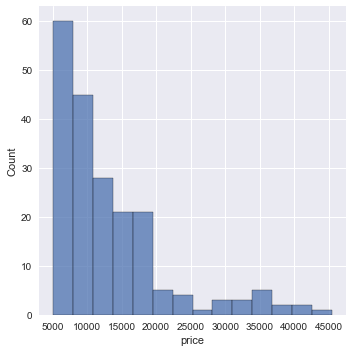

In [132]:
sns.displot(df['price'])

###  Randomised Grid Search Cross-Validation on Random Forest

In [146]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

In [147]:
from sklearn.model_selection import RandomizedSearchCV

# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 100, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(x1_train, y1_train)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_impurity_decrease': 0.1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'mae',
 'bootstrap': False}

### Hyperparameter Tuning Decision Tree 

In [148]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()

In [149]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [150]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [151]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [152]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [153]:
x =df.iloc[:,:-1]

In [154]:
y= df.iloc[:,-1]

In [155]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(x,y)

timer(start_time)

In [156]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [134]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(x1_train,y1_train)

DecisionTreeClassifier(random_state=42)

In [136]:
y_pred = dtree.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y1_train, y_pred = dtree.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y1_test, y_pred = y1_pred))

Train data accuracy: 0.01875
Test data accuracy: 0.024390243902439025
